In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
os.chdir("D:/Varun/Analytics Practice/Hackathons/AV_5_Women In Loop/Data")

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
print(train.shape)
print(test.shape)

(512087, 11)
(36000, 9)


In [5]:
train.head(5)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [6]:
test.head(5)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [7]:
data=pd.concat([train,test]).reset_index(drop=True)

In [8]:
train.shape,test.shape,data.shape

((512087, 11), (36000, 9), (548087, 11))

In [9]:
data.describe()

,Competition_Metric,Course_ID,Day_No,ID,Long_Promotion,Public_Holiday,Sales,Short_Promotion,User_Traffic
count,546203.000000,548087.000000,548087.000000,548087.000000,548087.000000,548087.000000,512087.000000,548087.000000,512087.000000
mean,0.073318,300.395678,466.286898,274044.000000,0.489802,0.030282,120.826924,0.381542,15375.101198
std,0.100069,173.355222,274.352901,158219.232832,0.499896,0.171361,54.355258,0.485765,7727.231205
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,168.000000
25%,0.010000,150.000000,229.000000,137022.500000,0.000000,0.000000,84.000000,0.000000,10584.000000
50%,0.035000,300.000000,457.000000,274044.000000,0.000000,0.000000,111.000000,0.000000,13776.000000
75%,0.094000,451.000000,711.000000,411065.500000,1.000000,0.000000,146.000000,1.000000,18123.000000
max,0.768000,600.000000,942.000000,548087.000000,1.000000,1.000000,682.000000,1.000000,100002.000000


In [10]:
data.info()
# data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548087 entries, 0 to 548086
Data columns (total 11 columns):
Competition_Metric    546203 non-null float64
Course_Domain         548087 non-null object
Course_ID             548087 non-null int64
Course_Type           548087 non-null object
Day_No                548087 non-null int64
ID                    548087 non-null int64
Long_Promotion        548087 non-null int64
Public_Holiday        548087 non-null int64
Sales                 512087 non-null float64
Short_Promotion       548087 non-null int64
User_Traffic          512087 non-null float64
dtypes: float64(3), int64(6), object(2)
memory usage: 46.0+ MB


#### Converting course id to object as this needs to be treated as categorical

In [11]:
data['Course_ID']=data['Course_ID'].astype('object')

In [12]:
data.isnull().sum()

Competition_Metric     1884
Course_Domain             0
Course_ID                 0
Course_Type               0
Day_No                    0
ID                        0
Long_Promotion            0
Public_Holiday            0
Sales                 36000
Short_Promotion           0
User_Traffic          36000
dtype: int64

### EDA

#### Univariate Analysis

#### Variable 1: Competition Metric

In [13]:
data['Competition_Metric'].describe()

count    546203.000000
mean          0.073318
std           0.100069
min           0.000000
25%           0.010000
50%           0.035000
75%           0.094000
max           0.768000
Name: Competition_Metric, dtype: float64

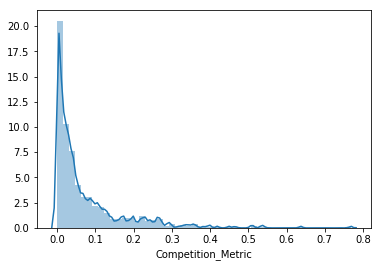

In [14]:
sns.distplot(data[data["Competition_Metric"].notnull()]["Competition_Metric"])

In [15]:
print("Skewness:",data["Competition_Metric"].skew())
print("Kurtosis:",data["Competition_Metric"].kurtosis())

Skewness: 2.577831759847189
Kurtosis: 8.78199831850812


In [16]:
cmetric=data[data["Competition_Metric"].notnull()]["Competition_Metric"]

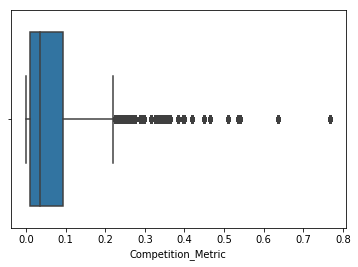

In [17]:
sns.boxplot(cmetric)

In [18]:
data["Competition_Metric"].describe(percentiles=[0.8,0.9,0.95,0.96,0.97,0.98,0.99,0.995])

count    546203.000000
mean          0.073318
std           0.100069
min           0.000000
50%           0.035000
80%           0.117000
90%           0.213000
95%           0.269000
96%           0.294000
97%           0.335000
98%           0.383000
99%           0.509000
99.5%         0.539000
max           0.768000
Name: Competition_Metric, dtype: float64

In [19]:
mstd=np.mean(data["Competition_Metric"])+3*np.std(data["Competition_Metric"])
print(data[data["Competition_Metric"]>mstd]['Competition_Metric'].count())
print(data[data["Competition_Metric"]>mstd]['Competition_Metric'].count()/data.shape[0])

11304
0.02062446290461186


In [20]:
perc=np.percentile(cmetric,99)
data[data["Competition_Metric"]>perc]["Competition_Metric"].count()
data[data["Competition_Metric"]>perc]["Competition_Metric"].count()/data.shape[0]

0.00859352621025494

In [21]:
data.corr()

,Competition_Metric,Day_No,ID,Long_Promotion,Public_Holiday,Sales,Short_Promotion,User_Traffic
Competition_Metric,1.000000,0.002382,-0.007414,-0.119880,-0.000740,-0.022085,0.000160,-0.148775
Day_No,0.002382,1.000000,0.001295,-0.014903,0.003717,0.060012,0.017254,0.021511
ID,-0.007414,0.001295,1.000000,-0.039447,0.001354,0.017037,0.000004,0.033604
Long_Promotion,-0.119880,-0.014903,-0.039447,1.000000,0.008749,-0.109455,-0.001010,-0.204289
Public_Holiday,-0.000740,0.003717,0.001354,0.008749,1.000000,-0.135052,-0.013007,-0.108305
Sales,-0.022085,0.060012,0.017037,-0.109455,-0.135052,1.000000,0.367762,0.829741
Short_Promotion,0.000160,0.017254,0.000004,-0.001010,-0.013007,0.367762,1.000000,0.198785
User_Traffic,-0.148775,0.021511,0.033604,-0.204289,-0.108305,0.829741,0.198785,1.000000


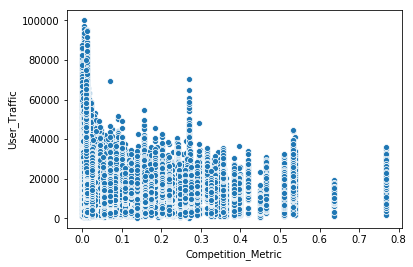

In [22]:
sns.scatterplot(x=data["Competition_Metric"],y=data["User_Traffic"])

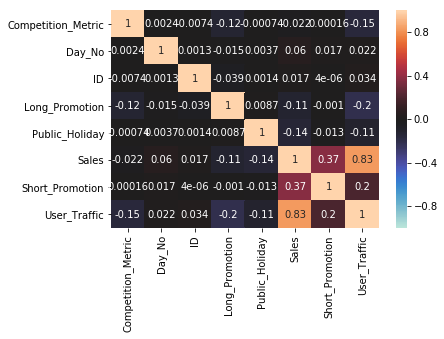

In [23]:
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,center=0)

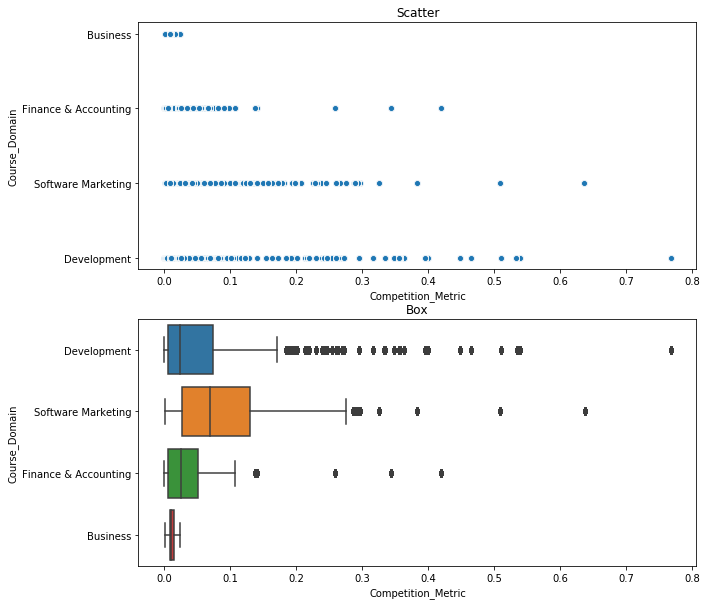

In [24]:
fig=plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.title("Scatter")
sns.scatterplot(x=data["Competition_Metric"],y=data["Course_Domain"])

plt.subplot(2,1,2)
plt.title("Box")
sns.boxplot(x=data["Competition_Metric"],y=data["Course_Domain"])

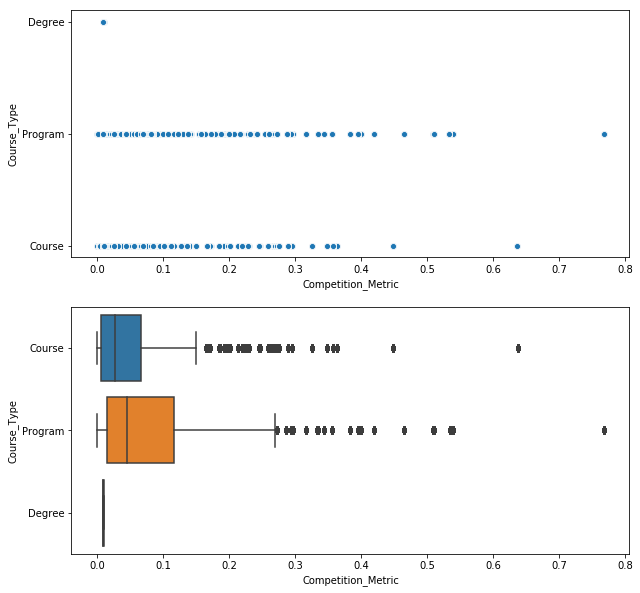

In [25]:
fig=plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.scatterplot(x=data["Competition_Metric"],y=data["Course_Type"])

plt.subplot(2,1,2)
sns.boxplot(x=data["Competition_Metric"],y=data["Course_Type"])

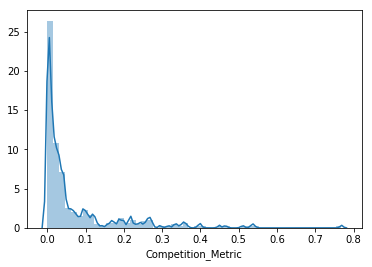

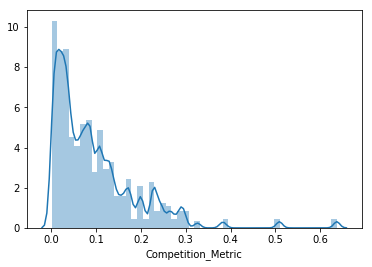

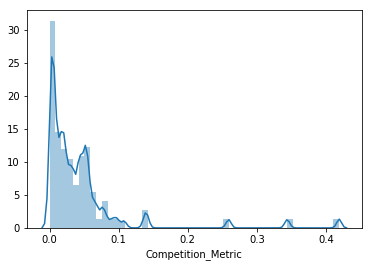

In [26]:
sns.distplot(data[(data["Course_Domain"]=="Development") & (data["Competition_Metric"].notnull())]["Competition_Metric"])
plt.show()

sns.distplot(data[(data["Course_Domain"]=="Software Marketing") & (data["Competition_Metric"].notnull())]["Competition_Metric"])
plt.show()

sns.distplot(data[(data["Course_Domain"]=="Finance & Accounting") & (data["Competition_Metric"].notnull())]["Competition_Metric"])
plt.show()

In [27]:
print(data["Course_Domain"].value_counts())
print(data["Course_Type"].value_counts())

Development             282775
Software Marketing      178052
Finance & Accounting     82550
Business                  4710
Name: Course_Domain, dtype: int64
Course     281347
Program    264856
Degree       1884
Name: Course_Type, dtype: int64


In [28]:
print("Development:",data[data["Course_Domain"]=="Development"]["Competition_Metric"].isnull().sum())
print("Software Marketing:",data[data["Course_Domain"]=="Software Marketing"]["Competition_Metric"].isnull().sum())
print("Finance & Accounting:",data[data["Course_Domain"]=="Finance & Accounting"]["Competition_Metric"].isnull().sum())
print("Business:",data[data["Course_Domain"]=="Business"]["Competition_Metric"].isnull().sum())

Development: 942
Software Marketing: 942
Finance & Accounting: 0
Business: 0


In [29]:
def comp_metr_mean():
    print("##### MEAN ######")
    print(np.mean(data["Competition_Metric"]))
    print(np.mean(data[data["Course_Domain"]=="Development"]["Competition_Metric"]))
    print(np.mean(data[data["Course_Domain"]=="Software Marketing"]["Competition_Metric"]))
comp_metr_mean()

##### MEAN ######
0.07331833402595396
0.06895952567659099
0.09588253627688634


##### Updating outliers of Competition metric w.r.t Course Domain

In [30]:
data["Competition_Metric"].groupby(data["Course_Domain"]).describe()

,count,mean,std,min,25%,50%,75%,max
Course_Domain,,,,,,,,
Business,4710.0,0.012200,0.007627,0.001,0.009,0.011,0.016,0.024
Development,281833.0,0.068960,0.109646,0.000,0.006,0.025,0.075,0.768
Finance & Accounting,82550.0,0.043276,0.064422,0.000,0.007,0.026,0.051,0.419
Software Marketing,177110.0,0.095883,0.093575,0.001,0.028,0.070,0.130,0.637


In [31]:
for cat in data["Course_Domain"].unique():
    print("----------------------------------------------------------------------------------")
    print("----",cat,"-----")
    perc=np.percentile(data[(data.Competition_Metric.notnull()) & (data["Course_Domain"]==cat)]["Competition_Metric"],[96,97,98,99,99.5,99.6,99.7,99.8,99.9,100])
    perc_value=[96,97,98,99,99.5,99.6,99.7,99.8,99.9,100]
    count=[]
#     print(perc)
    for i in perc:
#         print(data[data["Competition_Metric"]>i]["Competition_Metric"].count())
        count.append(data[(data["Competition_Metric"]>i) & (data["Course_Domain"]==cat)]["Competition_Metric"].count())

    dic={"percentile":perc_value,"value":perc,"count":count,"count_per":(count/data[data["Course_Domain"]==cat]["Competition_Metric"].count())*100}
    print(pd.DataFrame(dic))
    print("----------------------------------------------------------------------------------")

----------------------------------------------------------------------------------
---- Development -----
   percentile  value  count  count_per
0        96.0  0.348  10362   3.676645
1        97.0  0.364   7536   2.673924
2        98.0  0.449   4710   1.671202
3        99.0  0.534   1884   0.668481
4        99.5  0.539    942   0.334240
5        99.6  0.539    942   0.334240
6        99.7  0.768      0   0.000000
7        99.8  0.768      0   0.000000
8        99.9  0.768      0   0.000000
9       100.0  0.768      0   0.000000
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
---- Software Marketing -----
   percentile  value  count  count_per
0        96.0  0.287   6410   3.619220
1        97.0  0.294   4526   2.555474
2        98.0  0.326   2826   1.595619
3        99.0  0.509    942   0.531873
4        99.5  0.637      0   0.000000
5        99.6  0.637      0   0.000

In [32]:
data["Competition_Metric"]=data["Competition_Metric"].fillna(data["Competition_Metric"].groupby(data["Course_Domain"]).transform('mean'))

In [33]:
data["Competition_Metric"].isnull().sum()

0

In [34]:
data["Competition_Metric"].groupby(data["Course_Domain"]).count()

Course_Domain
Business                  4710
Development             282775
Finance & Accounting     82550
Software Marketing      178052
Name: Competition_Metric, dtype: int64

In [35]:
pc=np.percentile(data[data["Course_Domain"]=="Development"]["Competition_Metric"],99.6)
print(pc)

0.539


In [36]:
data[(data["Course_Domain"]=="Development") & (data["Competition_Metric"]>pc)]["Competition_Metric"].count()

942

In [37]:
data.loc[((data["Course_Domain"]=="Development") & (data["Competition_Metric"]>pc)),"Competition_Metric"]=pc

In [38]:
pc_fa=np.percentile(data[data["Course_Domain"]=="Finance & Accounting"]["Competition_Metric"],99.7)
print(pc_fa)
data[(data["Course_Domain"]=="Finance & Accounting") & (data["Competition_Metric"]>pc_fa)]["Competition_Metric"].count()

0.41899999999999993


942

In [39]:
data.loc[((data["Course_Domain"]=="Finance & Accounting") & (data["Competition_Metric"]>pc_fa)),"Competition_Metric"]=pc_fa

In [40]:
pc_sm=np.percentile(data[data["Course_Domain"]=="Software Marketing"]["Competition_Metric"],99)
print(pc_sm)
data[(data["Course_Domain"]=="Software Marketing") & (data["Competition_Metric"]>pc_sm)]["Competition_Metric"].count()

0.509


942

In [41]:
data.loc[((data["Course_Domain"]=="Software Marketing") & (data["Competition_Metric"]>pc_sm)),"Competition_Metric"]=pc_sm

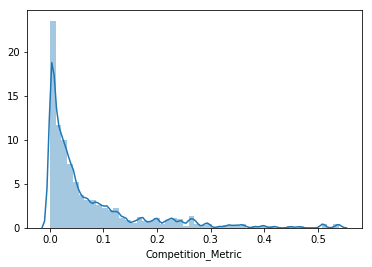

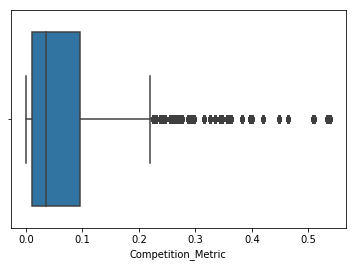

In [42]:
sns.distplot(data["Competition_Metric"])
plt.show()
sns.boxplot(data["Competition_Metric"])

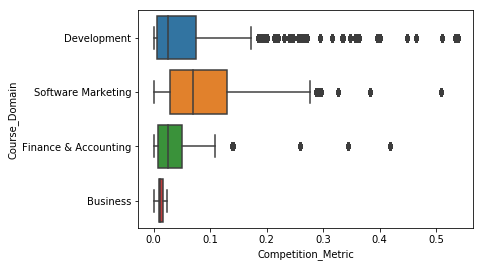

In [43]:
sns.boxplot(x=data["Competition_Metric"],y=data["Course_Domain"])

#### variable: Course Domain

In [44]:
pd.concat([data["Course_Domain"].value_counts(),data["Course_Domain"].value_counts(normalize=True)*100],axis=1,keys=['Counts','% Dist'])

,Counts,% Dist
Development,282775,51.593086
Software Marketing,178052,32.486083
Finance & Accounting,82550,15.061477
Business,4710,0.859353


#### variable: Course_ID

In [45]:
pd.concat([data["Course_ID"].value_counts(),data["Course_ID"].value_counts(normalize=True)*100],axis=1,keys=['Counts','% Dist'])

,Counts,% Dist
600,942,0.171871
216,942,0.171871
222,942,0.171871
221,942,0.171871
220,942,0.171871
219,942,0.171871
218,942,0.171871
217,942,0.171871
215,942,0.171871
206,942,0.171871


In [46]:
data["Course_ID"].nunique()

600

In [47]:
pd.crosstab(data["Course_Domain"],data["Course_ID"])

Course_ID,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
Course_Domain,,,,,,,,,,,,,,,,,,,,,
Business,0,0,0,0,0,0,0,0,0,0,...,0,0,0,942,0,0,0,0,0,0
Development,942,942,942,942,942,942,942,942,0,942,...,0,0,942,0,758,942,942,0,942,0
Finance & Accounting,0,0,0,0,0,0,0,0,0,0,...,942,0,0,0,0,0,0,942,0,0
Software Marketing,0,0,0,0,0,0,0,0,758,0,...,0,758,0,0,0,0,0,0,0,942


#### Target Encoding for Course ID to reduce categories

In [48]:
# !pip install category_encoders

In [49]:
from category_encoders import *

In [50]:
X=train["Course_ID"]
Y=train["Sales"]

In [51]:
TE=TargetEncoder(cols="Course_ID")

In [52]:
TE

TargetEncoder(cols='Course_ID', drop_invariant=False, handle_missing='value',
       handle_unknown='value', min_samples_leaf=1, return_df=True,
       smoothing=1.0, verbose=0)

In [53]:
TE.fit(X,Y)

TargetEncoder(cols=['Course_ID'], drop_invariant=False,
       handle_missing='value', handle_unknown='value', min_samples_leaf=1,
       return_df=True, smoothing=1.0, verbose=0)

In [54]:
TE.transform(X).head()

,Course_ID
0,85.251701
1,85.251701
2,85.251701
3,85.251701
4,85.251701


In [55]:
data["Course_ID_TR"]=TE.transform(data["Course_ID"])

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548087 entries, 0 to 548086
Data columns (total 12 columns):
Competition_Metric    548087 non-null float64
Course_Domain         548087 non-null object
Course_ID             548087 non-null object
Course_Type           548087 non-null object
Day_No                548087 non-null int64
ID                    548087 non-null int64
Long_Promotion        548087 non-null int64
Public_Holiday        548087 non-null int64
Sales                 512087 non-null float64
Short_Promotion       548087 non-null int64
User_Traffic          512087 non-null float64
Course_ID_TR          548087 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 50.2+ MB


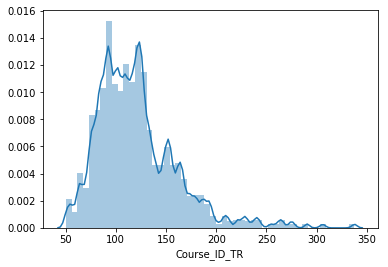

In [57]:
sns.distplot(data["Course_ID_TR"])

#### variable: Course_Type

In [58]:
pd.concat([data["Course_Type"].value_counts(),data["Course_Type"].value_counts(normalize=True)*100],axis=1,keys=['Counts','% Dist'])

,Counts,% Dist
Course,281347,51.332544
Program,264856,48.323715
Degree,1884,0.343741


In [59]:
pd.crosstab(data["Course_Domain"],data["Course_Type"])

Course_Type,Course,Degree,Program
Course_Domain,,,
Business,2826,1884,0
Development,169323,0,113452
Finance & Accounting,42780,0,39770
Software Marketing,66418,0,111634


In [60]:
print(pd.crosstab(data["Course_Domain"],data["Course_Type"]))
print("------------------------------------------------------")
print((pd.crosstab(data["Course_Domain"],data["Course_Type"])/data.shape[0])*100)

Course_Type           Course  Degree  Program
Course_Domain                                
Business                2826    1884        0
Development           169323       0   113452
Finance & Accounting   42780       0    39770
Software Marketing     66418       0   111634
------------------------------------------------------
Course_Type              Course    Degree    Program
Course_Domain                                       
Business               0.515612  0.343741   0.000000
Development           30.893453  0.000000  20.699633
Finance & Accounting   7.805330  0.000000   7.256147
Software Marketing    12.118149  0.000000  20.367934


#### variable: Day_no

In [61]:
data["Day_No"].describe()

count    548087.000000
mean        466.286898
std         274.352901
min           1.000000
25%         229.000000
50%         457.000000
75%         711.000000
max         942.000000
Name: Day_No, dtype: float64

In [62]:
data["Day_No"].nunique()

942

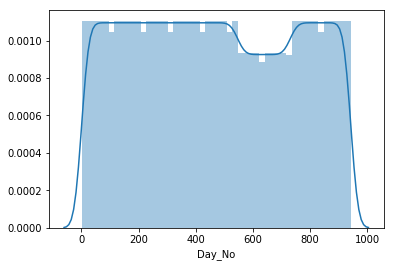

In [63]:
sns.distplot(data["Day_No"])

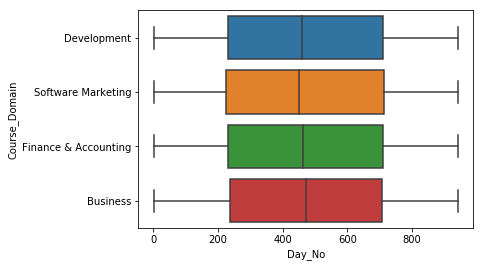

In [64]:
sns.boxplot(x=data["Day_No"],y=data["Course_Domain"])

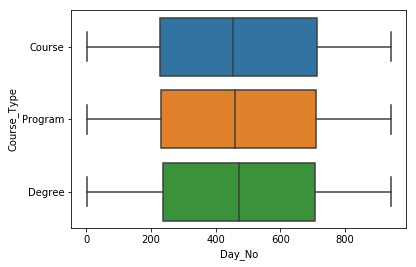

In [65]:
sns.boxplot(x=data["Day_No"],y=data["Course_Type"])

#### variable: ID

In [66]:
data.shape

(548087, 12)

In [67]:
data.ID.count(),data.ID.nunique()

(548087, 548087)

#### variable: Long_Promotion

In [68]:
pd.concat([data["Long_Promotion"].value_counts(),data["Long_Promotion"].value_counts(normalize=True)*100],axis=1)

,Long_Promotion,Long_Promotion
0,279633,51.01982
1,268454,48.98018


#### variable:Public_Holiday

In [69]:
pd.concat([data["Public_Holiday"].value_counts(),data["Public_Holiday"].value_counts(normalize=True)*100],axis=1)

,Public_Holiday,Public_Holiday
0,531490,96.971831
1,16597,3.028169


#### variable: Short_Promotion

In [70]:
pd.concat([data["Short_Promotion"].value_counts(),data["Short_Promotion"].value_counts(normalize=True)*100],axis=1)

,Short_Promotion,Short_Promotion
0,338969,61.845838
1,209118,38.154162


#### variable: User_Traffic (not available in test dataset)

In [71]:
data["User_Traffic"].describe()

count    512087.000000
mean      15375.101198
std        7727.231205
min         168.000000
25%       10584.000000
50%       13776.000000
75%       18123.000000
max      100002.000000
Name: User_Traffic, dtype: float64

In [72]:
data["User_Traffic"].isnull().sum()

36000

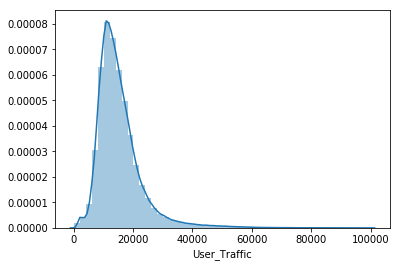

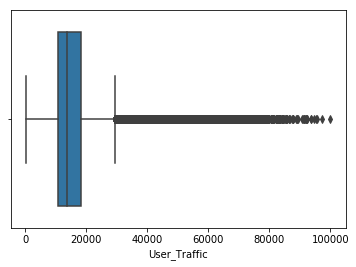

In [73]:
sns.distplot(data[data["User_Traffic"].notnull()]["User_Traffic"])
plt.show()
sns.boxplot(data[data["User_Traffic"].notnull()]["User_Traffic"])

#### Dependent Variable: Sales

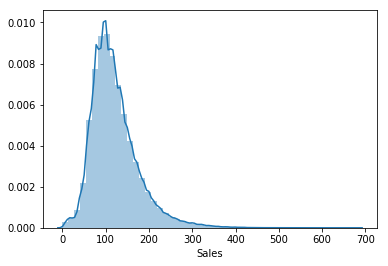

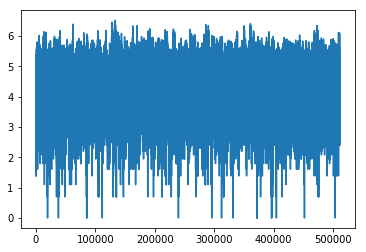

In [74]:
sns.distplot(data[data["Sales"].notnull()]["Sales"])
plt.show()
plt.plot(np.log(data[data["Sales"].notnull()]["Sales"]))

### Bivariate Analysis (Using Train data)

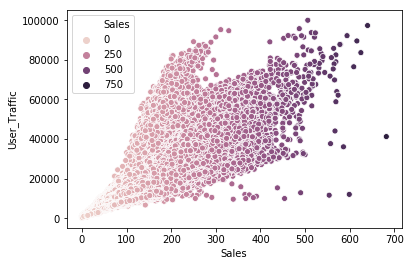

In [75]:
sns.scatterplot(x=train["Sales"],y=train["User_Traffic"],hue=train["Sales"])

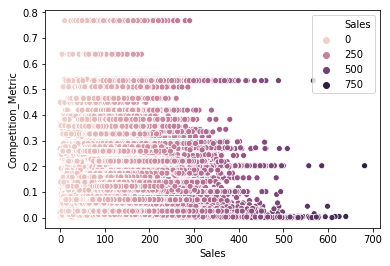

In [76]:
sns.scatterplot(x=train["Sales"],y=train["Competition_Metric"],hue=train["Sales"])

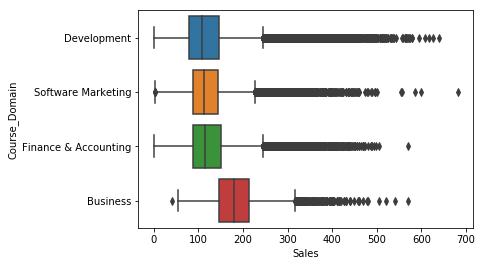

In [77]:
sns.boxplot(x=train["Sales"],y=train["Course_Domain"])

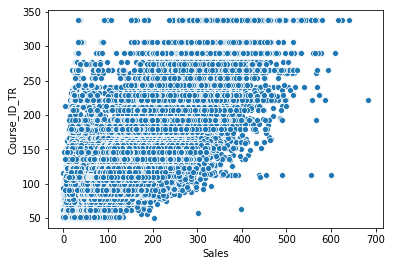

In [78]:
sns.scatterplot(x=train["Sales"],y=data[data["Sales"].notnull()]["Course_ID_TR"])

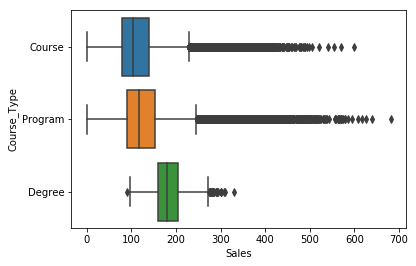

In [79]:
sns.boxplot(x=train["Sales"],y=train["Course_Type"])

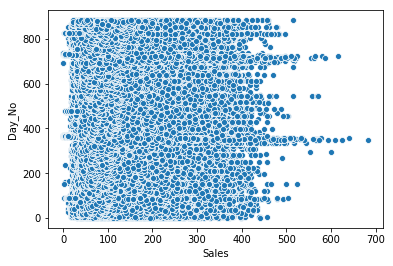

In [80]:
sns.scatterplot(x=train["Sales"],y=train["Day_No"])

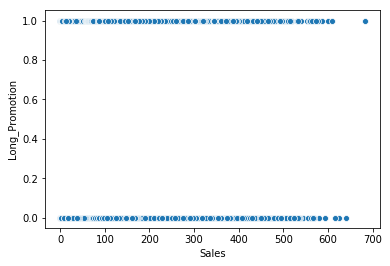

In [81]:
sns.scatterplot(x=train["Sales"],y=train["Long_Promotion"])

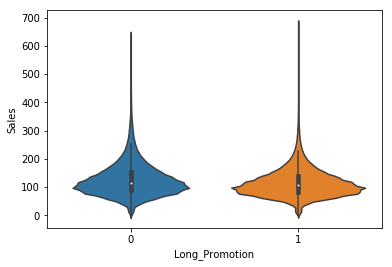

In [82]:
sns.violinplot(y=train["Sales"],x=train["Long_Promotion"])

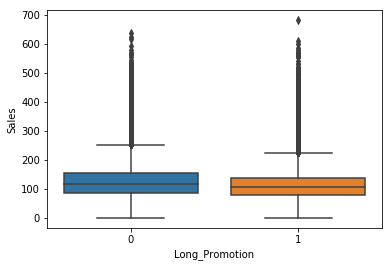

In [83]:
sns.boxplot(y=train["Sales"],x=train["Long_Promotion"])

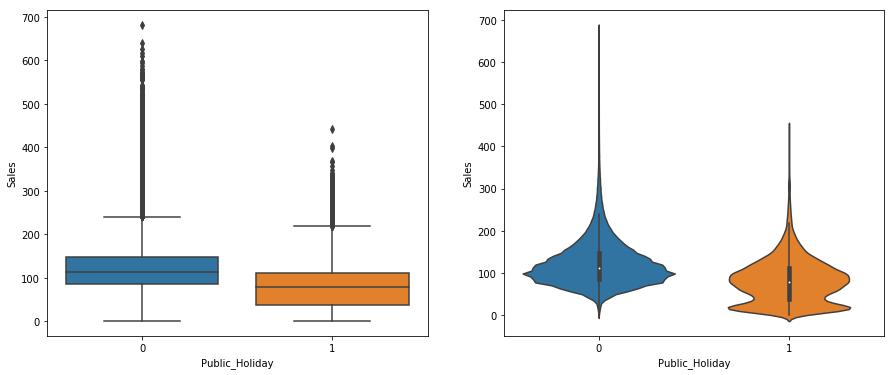

In [84]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(y=train["Sales"],x=train["Public_Holiday"])
plt.subplot(1,2,2)
sns.violinplot(y=train["Sales"],x=train["Public_Holiday"])

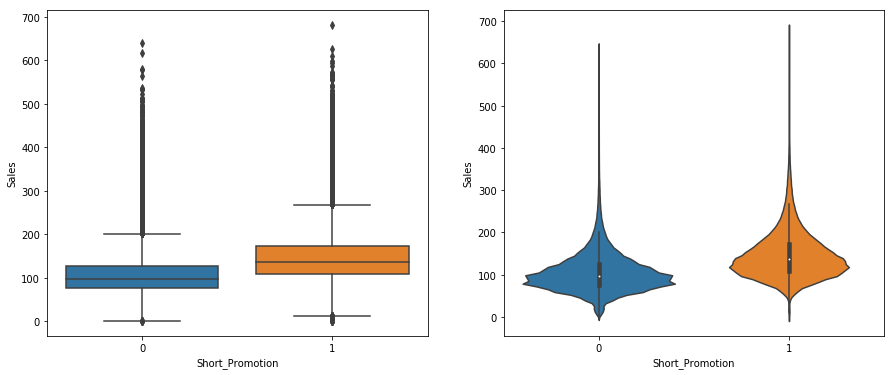

In [85]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(y=train["Sales"],x=train["Short_Promotion"])
plt.subplot(1,2,2)
sns.violinplot(y=train["Sales"],x=train["Short_Promotion"])

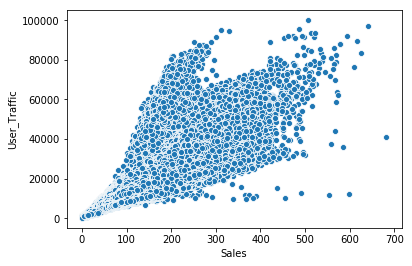

In [86]:
sns.scatterplot(data["Sales"],data["User_Traffic"])

## Data preparation for Model

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548087 entries, 0 to 548086
Data columns (total 12 columns):
Competition_Metric    548087 non-null float64
Course_Domain         548087 non-null object
Course_ID             548087 non-null object
Course_Type           548087 non-null object
Day_No                548087 non-null int64
ID                    548087 non-null int64
Long_Promotion        548087 non-null int64
Public_Holiday        548087 non-null int64
Sales                 512087 non-null float64
Short_Promotion       548087 non-null int64
User_Traffic          512087 non-null float64
Course_ID_TR          548087 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 50.2+ MB


In [88]:
data_cl=data.copy()

In [89]:
data_cl.to_csv("Data_Clean.csv")

In [90]:
data_cl.isnull().sum()

Competition_Metric        0
Course_Domain             0
Course_ID                 0
Course_Type               0
Day_No                    0
ID                        0
Long_Promotion            0
Public_Holiday            0
Sales                 36000
Short_Promotion           0
User_Traffic          36000
Course_ID_TR              0
dtype: int64

In [91]:
data_cl.drop(["ID","User_Traffic","Course_ID"],axis=1,inplace=True)

In [92]:
data_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548087 entries, 0 to 548086
Data columns (total 9 columns):
Competition_Metric    548087 non-null float64
Course_Domain         548087 non-null object
Course_Type           548087 non-null object
Day_No                548087 non-null int64
Long_Promotion        548087 non-null int64
Public_Holiday        548087 non-null int64
Sales                 512087 non-null float64
Short_Promotion       548087 non-null int64
Course_ID_TR          548087 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 37.6+ MB


In [93]:
data_cl=pd.get_dummies(data_cl,drop_first=True)

In [94]:
data_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548087 entries, 0 to 548086
Data columns (total 12 columns):
Competition_Metric                    548087 non-null float64
Day_No                                548087 non-null int64
Long_Promotion                        548087 non-null int64
Public_Holiday                        548087 non-null int64
Sales                                 512087 non-null float64
Short_Promotion                       548087 non-null int64
Course_ID_TR                          548087 non-null float64
Course_Domain_Development             548087 non-null uint8
Course_Domain_Finance & Accounting    548087 non-null uint8
Course_Domain_Software Marketing      548087 non-null uint8
Course_Type_Degree                    548087 non-null uint8
Course_Type_Program                   548087 non-null uint8
dtypes: float64(3), int64(4), uint8(5)
memory usage: 31.9 MB


In [95]:
data_cl.to_csv("Data_Clean_withDummy.csv")

In [96]:
train_cl=data_cl[data_cl['Sales'].notnull()]
test_cl=data_cl[data_cl['Sales'].isnull()]

In [97]:
train_cl.to_csv("train_clean.csv")
test_cl.to_csv("test_clean.csv")

In [98]:
test_cl.drop("Sales",axis=1,inplace=True)

In [99]:
test_cl.columns

Index(['Competition_Metric', 'Day_No', 'Long_Promotion', 'Public_Holiday',
       'Short_Promotion', 'Course_ID_TR', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Degree',
       'Course_Type_Program'],
      dtype='object')

### Model Building

In [100]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_validate
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
train_cl.columns

Index(['Competition_Metric', 'Day_No', 'Long_Promotion', 'Public_Holiday',
       'Sales', 'Short_Promotion', 'Course_ID_TR', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Degree',
       'Course_Type_Program'],
      dtype='object')

In [102]:
train_cl_Y=train_cl["Sales"]
train_cl_X=train_cl.drop("Sales",axis=1)

In [103]:
# print(train_cl_Y)
print(train_cl_X.columns)

Index(['Competition_Metric', 'Day_No', 'Long_Promotion', 'Public_Holiday',
       'Short_Promotion', 'Course_ID_TR', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Degree',
       'Course_Type_Program'],
      dtype='object')


In [104]:
X_train,X_test,Y_train,Y_test=train_test_split(train_cl_X,train_cl_Y,train_size=0.8,random_state=100)

In [105]:
print(X_train.head(2))
print("--------------------------------------")
print(X_test.head(2))
print("--------------------------------------")
print(Y_train.head(2))
print("--------------------------------------")
print(Y_test.head(2))

        Competition_Metric  Day_No  Long_Promotion  Public_Holiday  \
66495                0.013     422               1               0   
489260               0.002     436               1               0   

        Short_Promotion  Course_ID_TR  Course_Domain_Development  \
66495                 0    107.234957                          0   
489260                0    111.809524                          0   

        Course_Domain_Finance & Accounting  Course_Domain_Software Marketing  \
66495                                    0                                 1   
489260                                   0                                 1   

        Course_Type_Degree  Course_Type_Program  
66495                    0                    1  
489260                   0                    0  
--------------------------------------
        Competition_Metric  Day_No  Long_Promotion  Public_Holiday  \
311266               0.106     853               0               0   
362025        

In [106]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [107]:
print("Intercept:",lr.intercept_)

Intercept: -19.123206959909723


In [108]:
pd.DataFrame(lr.coef_,X_train.columns,columns=['Coefficient'])

,Coefficient
Competition_Metric,-0.058344
Day_No,0.011062
Long_Promotion,0.261539
Public_Holiday,-39.677280
Short_Promotion,40.765048
Course_ID_TR,0.998966
Course_Domain_Development,0.130005
Course_Domain_Finance & Accounting,-0.071443
Course_Domain_Software Marketing,0.159511
Course_Type_Degree,-0.325629


In [109]:
Y_pred=lr.predict(X_test)

In [110]:
print("Mean Squared Error : ",mean_squared_error(Y_test,Y_pred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("R2 : ",r2_score(Y_test,Y_pred))

Mean Squared Error :  840.1123647249084
Root Mean Squared Error :  28.984691903225542
R2 :  0.7154342591348346


In [111]:
sm.OLS(Y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 7.453e+05
Date:                Fri, 03 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:48:37   Log-Likelihood:            -1.9594e+06
No. Observations:              409669   AIC:                         3.919e+06
Df Residuals:                  409658   BIC:                         3.919e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Competition_Metric                    -0.5522      0.486     -1.135      0.256      -1.506       0.401
Day_No                                 0.0105      0.000     59.823      0.000       0.010       0.011
Long_Promotion                        -0.0045      0.093     -0.049      0.961      -0.187       0.178
Public_Holiday                       -39.7496      0.258   -154.100      0.000     -40.255     -39.244
Short_Promotion                       40.6306      0.093    437.317      0.000      40.449      40.813
Course_ID_TR                           0.9880      0.001    905.599      0.000       0.986       0.990
Course_Domain_Development            -17.3075      0.176    -98.179      0.000     -17.653     -16.962
Course_Domain_Finance & Accounting   -17.4883      0.203    -86.158      0.000     -17.886     -17.090
Course_Domain_Software Marketing     -17.2791      0.193    -89.618      0.000     -17.657     -16.901
Course_Type_Degree                   -16.9893      0.798    -21.281      0.000     -18.554     -15.425
Course_Type_Program                    0.1230      0.095      1.294      0.196      -0.063       0.309
==============================================================================
Omnibus:                   116072.787   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           951518.795
Skew:                           1.135   Prob(JB):                         0.00
Kurtosis:                      10.112   Cond. No.                     9.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 0.98, 'Actual vs Predicted')

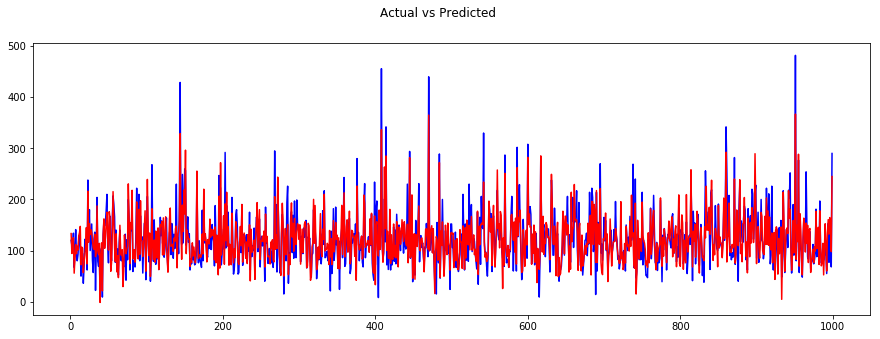

In [112]:
c=[i for i in range(1,1000,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,Y_test[1:1000],color="blue")
plt.plot(c,Y_pred[1:1000],color="red")
fig.suptitle("Actual vs Predicted")

In [113]:
print(Y_test.shape)
print(Y_pred.shape)

(102418,)
(102418,)


Text(0.5, 0.98, 'Error')

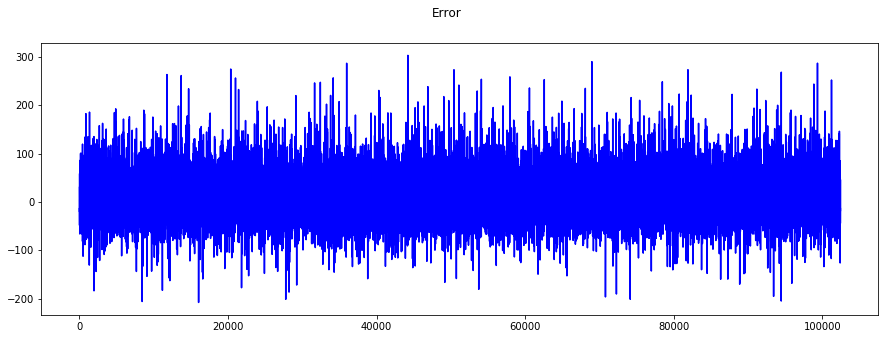

In [114]:
c=[i for i in range(1,102419,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,Y_test-Y_pred,color="blue")
fig.suptitle("Error")

In [115]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_cl_X.values, i) for i in range(train_cl_X.shape[1])]
vif["features"] = train_cl_X.columns

In [116]:
vif.round(2)

,VIF Factor,features
0,1.69,Competition_Metric
1,3.84,Day_No
2,2.08,Long_Promotion
3,1.03,Public_Holiday
4,1.61,Short_Promotion
5,9.51,Course_ID_TR
6,7.89,Course_Domain_Development
7,3.06,Course_Domain_Finance & Accounting
8,5.92,Course_Domain_Software Marketing
9,1.09,Course_Type_Degree


In [117]:
def output_file(pred,filename):
    test1=pd.read_csv("test.csv")
    pred_data=pd.concat([test1,pd.DataFrame({'Sales':pred})],axis=1)
    pred_data=pred_data[['ID','Sales']]
    pred_data.to_csv(filename,index=False)

In [118]:
pred=lr.predict(test_cl)

In [119]:
output_file(pred,"Pred1_LinearRegression.csv")

In [120]:
def reg_combi(X,filename):
    X_train,X_test,Y_train,Y_test=train_test_split(X,train_cl_Y,train_size=0.8,random_state=100)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    Y_pred=lr.predict(X_test)
    print("Mean Squared Error : ",mean_squared_error(Y_test,Y_pred))
    print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(Y_test,Y_pred)))
    print("R2 : ",r2_score(Y_test,Y_pred))
    
    test_pred=test_cl[X.columns]
    pred=lr.predict(test_pred)
    output_file(pred,filename)

In [121]:
train_cl_X.columns

Index(['Competition_Metric', 'Day_No', 'Long_Promotion', 'Public_Holiday',
       'Short_Promotion', 'Course_ID_TR', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Degree',
       'Course_Type_Program'],
      dtype='object')

In [122]:
X=train_cl_X.drop("Course_ID_TR",axis=1)

In [123]:
reg_combi(X,"Pred1_1_LinearRegression_wo_CourseID.csv")

Mean Squared Error :  2365.9198642765236
Root Mean Squared Error :  48.64072228366396
R2 :  0.1986075110013208


In [124]:
X=train_cl_X.drop("Long_Promotion",axis=1)
reg_combi(X,"Pred1_2_LinearRegression_wo_CourseID.csv")

Mean Squared Error :  840.1250179690365
Root Mean Squared Error :  28.984910177004803
R2 :  0.7154299731845964


In [125]:
X=train_cl_X.drop("Competition_Metric",axis=1)
reg_combi(X,"Pred1_3_LinearRegression_wo_compMetric.csv")

Mean Squared Error :  840.1122837333492
Root Mean Squared Error :  28.98469050608181
R2 :  0.7154342865685732


### Model imporovement

In [126]:
X_train.shape

(409669, 11)

In [127]:
X_test.columns

Index(['Competition_Metric', 'Day_No', 'Long_Promotion', 'Public_Holiday',
       'Short_Promotion', 'Course_ID_TR', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Degree',
       'Course_Type_Program'],
      dtype='object')

In [128]:
# Data to consider further
X_train1=X_train.drop("Long_Promotion",axis=1)
X_test1=X_test.drop("Long_Promotion",axis=1)
Y_train1=Y_train.copy()
Y_test1=Y_test.copy()
test_cl1=test_cl.drop("Long_Promotion",axis=1)   # Data for prediction of submission

In [129]:
def bestmodel(model,mp,X,Y):
    gscv=GridSearchCV(estimator=model,
                      cv=5,
                      param_grid=mp,
                      verbose=1,
                      n_jobs=-1,
                      scoring='neg_mean_squared_error')
    gscv.fit(X,Y)
    print(model)
    print("\n-------------------------------------------------")
    print("\nModel Parameter :  ",mp)
    print("\nBest Parameter : ",gscv.best_params_)
    print("\nScore : ",gscv.best_score_)
    print("\n-------------------------------------------------")
    return gscv

### Lasso Regression

In [ ]:
mp={'alpha':[0.001,0.01,0.02,0.03,0.05,0.1,1,1.5,1.75,2,10,15,20,25,100],'normalize':[True,False]}
lasso=Lasso()

In [ ]:
gscv=bestmodel(lasso,mp,X_train1,Y_train1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   57.0s finished


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

-------------------------------------------------

Model Parameter :   {'alpha': [0.001, 0.01, 0.02, 0.03, 0.05, 0.1, 1, 1.5, 1.75, 2, 10, 15, 20, 25, 100], 'normalize': [True, False]}

Best Parameter :  {'alpha': 0.01, 'normalize': False}

Score :  -833.5968064112627

-------------------------------------------------


In [ ]:
lasso=Lasso(**gscv.best_params_)
ls=lasso.fit(X_train1,Y_train1)
lp=ls.predict(X_test1)

print("Mean Squared Error : ",mean_squared_error(Y_test1,lp))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(Y_test,lp)))
print("R2 : ",r2_score(Y_test,lp))

lp_final=ls.predict(test_cl1)
output_file(lp_final,"Pred2_Lasso_Regression.csv")

Mean Squared Error :  840.1119728912805
Root Mean Squared Error :  28.98468514390454
R2 :  0.7154343918580646


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
mp={'max_depth':[5,8,10,12,15,18,20,None],
    'random_state':[0],
    'min_samples_leaf':[1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,90,100,120,150,200]   
   }

DT=DecisionTreeRegressor()
gscv=bestmodel(DT,mp,X_train1,Y_train1)

DT_final=DecisionTreeRegressor(**gscv.best_params_)
DT_final.fit(X_train1,Y_train1)
DT_Pred=DT_final.predict(X_test1)

print("Mean Squared Error : ",mean_squared_error(Y_test1,DT_Pred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(Y_test1,DT_Pred)))
print("R2 : ",r2_score(Y_test1,DT_Pred))

DT_final_pred=DT_final.predict(test_cl1)
output_file(DT_final_pred,"Pred3_Decision_Tree.csv")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 14.3min finished


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

-------------------------------------------------

Model Parameter :   {'max_depth': [5, 8, 10, 12, 15, 18, 20, None], 'random_state': [0], 'min_samples_leaf': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100, 120, 150, 200]}

Best Parameter :  {'max_depth': None, 'min_samples_leaf': 10, 'random_state': 0}

Score :  -478.3510863277683

-------------------------------------------------
Mean Squared Error :  446.7455327887097
Root Mean Squared Error :  21.1363557121068
R2 :  0.8486768212751518


### Random Forest Regressor

In [ ]:
%timeit
from sklearn.ensemble import RandomForestRegressor
# [x for x in range(5,200,5)]

mp={'n_estimators':[100],
    'random_state':[0],
    }

RF=RandomForestRegressor()
gscv=bestmodel(RF,mp,X_train1,Y_train1)


RF_final=RandomForestRegressor(**gscv.best_params_)
RF_final.fit(X_train1,Y_train1)

RF_Pred=RF_final.predict(X_test1)

print("Mean Squared Error : ",mean_squared_error(Y_test1,RF_Pred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(Y_test1,RF_Pred)))
print("R2 : ",r2_score(Y_test1,RF_Pred))

RF_final_pred=RF_final.predict(test_cl1)
output_file(RF_final_pred,"Pred4_1_RandomForest_est100.csv")


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [1]:
from sklearn.datasets import make_regression

In [8]:
make_regression

<function sklearn.datasets.samples_generator.make_regression(n_samples=100, n_features=100, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)>

In [4]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

In [9]:
y

array([-8.42877859e+01, -9.94927008e+01,  1.05787034e+01,  5.37899294e+01,
       -3.70135471e+00,  3.75987136e+01, -1.35735590e+02,  9.35036987e+01,
       -1.03941968e+02,  1.41989579e+01,  1.12479751e+02,  3.00996991e+02,
        1.09526570e+01, -1.07835903e+02,  3.77182129e+01,  1.54366306e+02,
       -4.96393292e+01,  6.23171752e+01, -2.55567671e+02,  4.13245345e+01,
       -1.23446014e+01, -6.10173687e+01,  1.70252877e+02,  1.14872670e+01,
       -3.20300581e+01, -7.01207608e+01,  2.38563440e+01, -1.35524167e+02,
       -9.41054198e+01, -5.91991022e+01, -1.28756571e+02, -2.74040879e+02,
       -1.04228021e+02,  2.25645580e+01,  6.68745459e+01, -1.65001206e+02,
       -3.26368058e+02, -8.41699009e+01, -1.40487772e+02, -1.13560037e+02,
       -8.21439461e+01, -7.06317277e+01,  5.87671092e+01, -1.30319586e+02,
       -1.79488620e+01, -4.33391987e+01,  4.15431377e+02,  1.64720491e+02,
       -2.21775008e+01, -6.46293437e+01, -5.17193029e+01,  3.75124689e+02,
       -1.18336852e+02,  